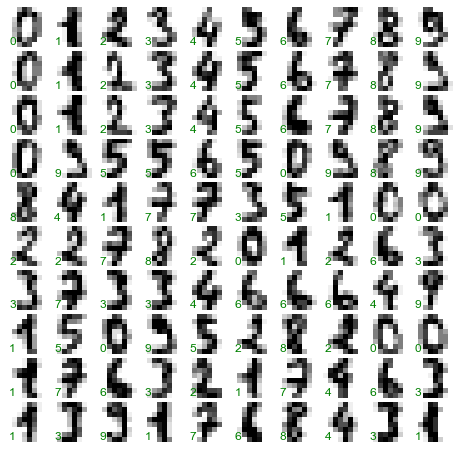

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns; sns.set()

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                      subplot_kw = {'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform = ax.transAxes, color = 'green')

In [44]:
x = digits.data
print(x.shape)

y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [24]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

C:\Users\thomas.preston\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


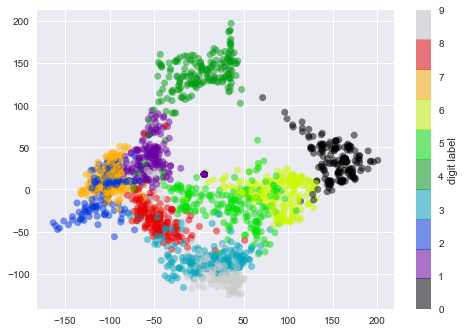

In [25]:
plt.scatter(data_projected[:,0], data_projected[:,1], c = digits.target,
           edgecolor = 'none', alpha = 0.5,
           cmap = plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks = range(10))
# plt.clim(-0.5, 9.5)

In [49]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

from sklearn.naive_bayes import GaussianNB
mod = GaussianNB()
mod.fit(xtrain, ytrain)
y_model = mod.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

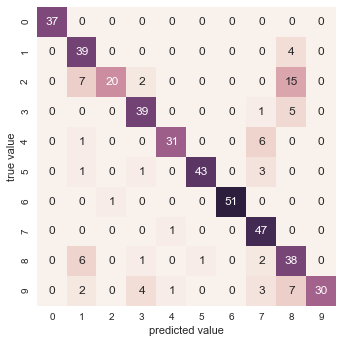

In [52]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

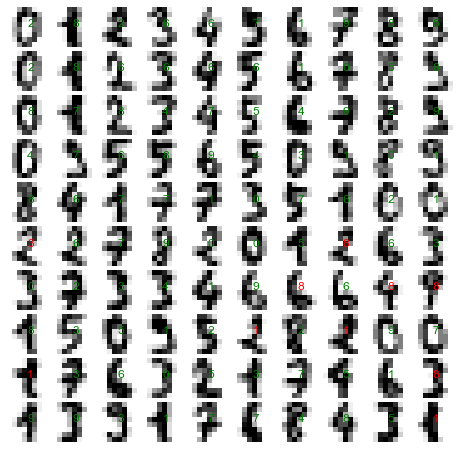

In [60]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.5, 0.5, str(y_model[i]),
           transform = ax.transAxes,
           color = 'green' if (ytest[i] == y_model[i]) else 'red')